# 4장 신경망 학습 - 계속

## 경사법
일단 기울기를 가지고 경사하강법을 쓰지만, 실제로 그곳이 함수의 최솟값이 없는 경우도 많다. 안장점(saddle point) 일수도 있고, 평평한 고원(plateau) 로 들어갈 수도 있다. (최솟값은 아니고, 그저 기울기는 작은 곳들) 그래도 일단 그쪽으로 가야한다.

* GDM : 경사진 곳을 따라 내려가기 - 경사하강법 - gradient descent method 
* SGD : 미니배치로 무작위로 선정한 데이터로 경사하강을 한다. 확률적 경사 하강(stochastic gradient descent)

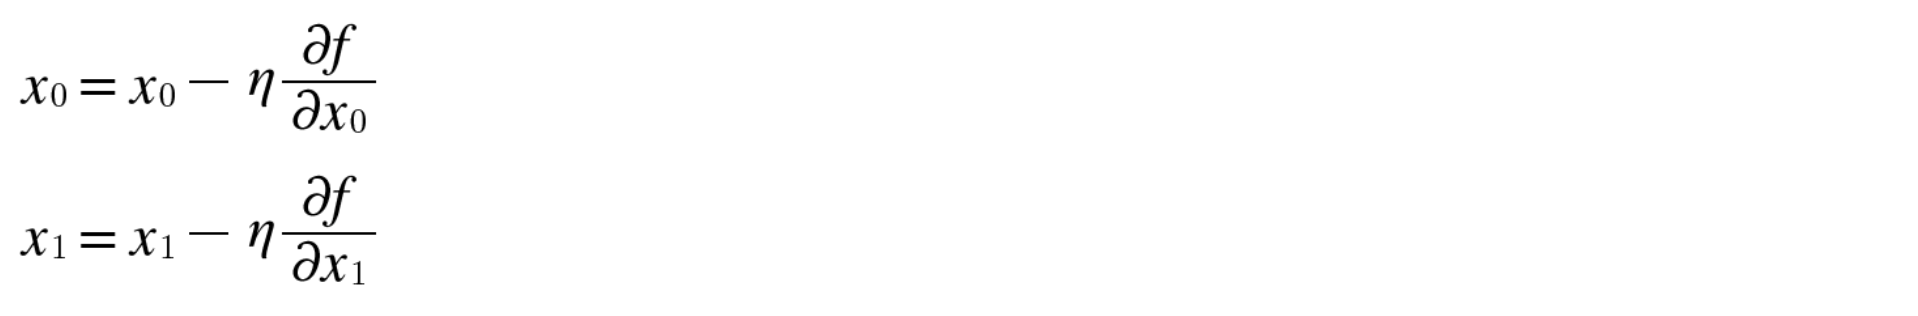

In [17]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

x_1 = []
x_0 = []
def gradient_descent(f, init_x, lr=0.01, step_num=200):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)  # 기울기를 구하고
        x -= lr * grad                   # grad 쪽으로 lr 만큼 이동한다.
        # print(x)                       # 요기 코멘트 벗겨보면 이동하는게 보인다!!!!!!!!!!
        x_0.append(x[0])
        x_1.append(x[1])
    return x

def func(x):
    return x[0]**2 + x[1]**2

gradient_descent(func, init_x=np.array([-3.0, 4.0]), lr=0.1, step_num=100)
gradient_descent(func, init_x=np.array([3.0, -4.0]), lr=0.1, step_num=100)
gradient_descent(func, init_x=np.array([3.0, -2.0]), lr=0.1, step_num=100)
gradient_descent(func, init_x=np.array([-3.0, 
                                        2.0]), lr=0.1, step_num=100)

array([-6.11110793e-10,  4.07407195e-10])

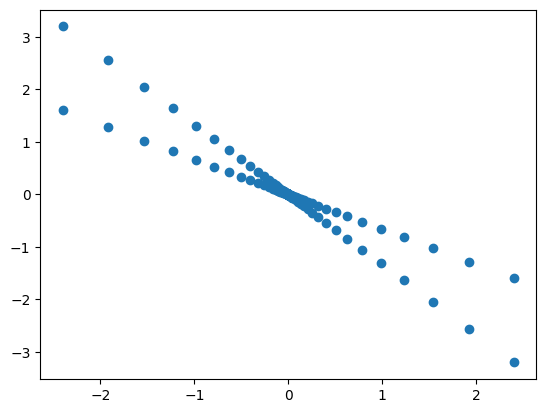

In [18]:
# 답이 거의 0에 가까운 수가 된다. 실제로 저 함수는 (0,0) 에서 최솟값을 가진다.
from matplotlib.pylab import plt
plt.plot(x_0, x_1, 'o')

답이 거의 0에 가까운 수가 된다. 실제로 저 함수는 (0,0) 에서 최솟값을 가진다.

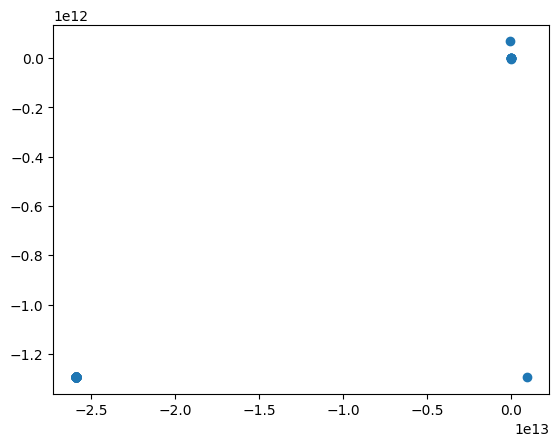

In [23]:
# learning rate 이 너무 크거나 작으면 좋지 않다. (잘... 정해야 한다?)
x_1 = []
x_0 = []
gradient_descent(func, init_x=np.array([-3.0, 4.0]), lr=10.0, step_num=100)
plt.plot(x_0, x_1, 'o')  # 어디로 가는 거냐

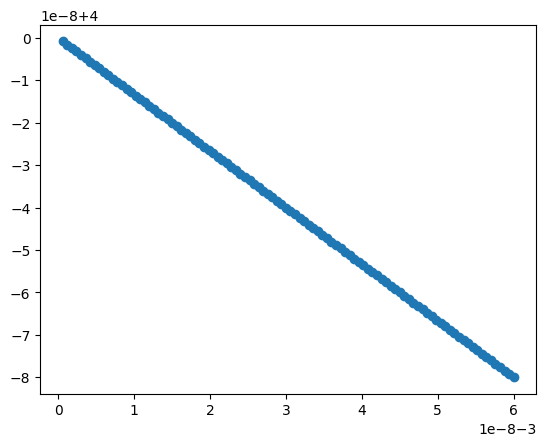

In [24]:
x_1 = []
x_0 = []
gradient_descent(func, init_x=np.array([-3.0, 4.0]), lr=1e-10, step_num=100)
plt.plot(x_0, x_1, 'o')   # 얼마나 더 가야하는거냐.

## 신경망에서의 기울기 

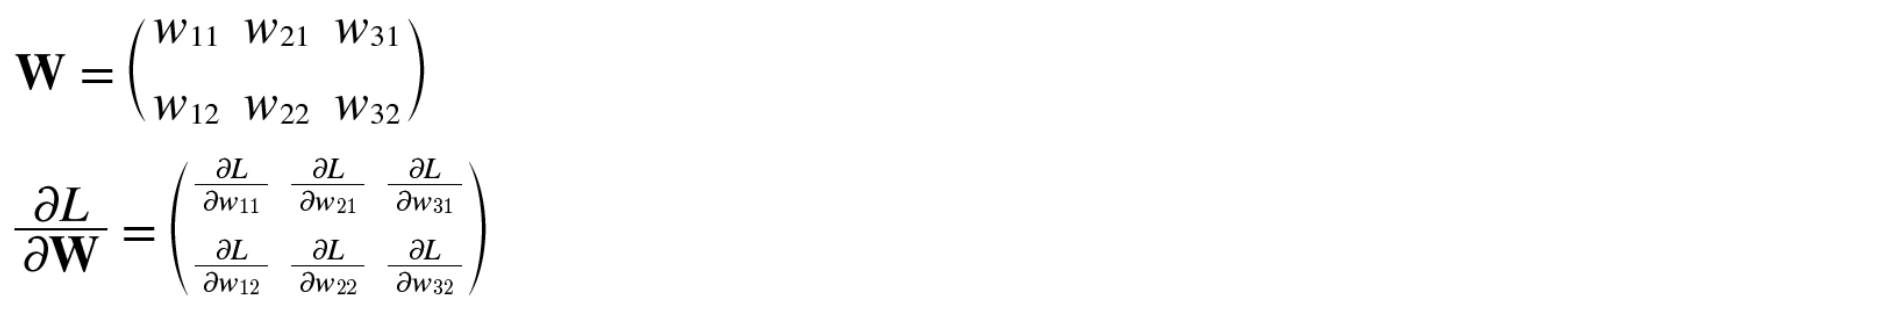

$\partial L / \partial W$ 는 각 원소에 대한 편미분. 첫번째 원소는 $w{11}$ 을 조금 변경했을때 손실함수 L이 얼마나 변하는가임.

In [19]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [20]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

# ??? 요기는 나중에 다시 보자.

[[-1.24665088  1.27077001 -0.60729709]
 [-0.28559133  0.11076715  0.15251487]]
[-1.00502272  0.86215244 -0.22711487]
